# Lab 3: Building an Image Classifier from Scratch

Project By:

  Siddhesh Dwarkanath Munagekar : W0747944



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
import os
import cv2
import glob
tf.__version__

'2.3.0'

# Dataset Loading and Preprocessing with Image Data Generator


Mounted at /content/drive


Text(0.5, 1.0, 'Object of Interest- Giant Panda')

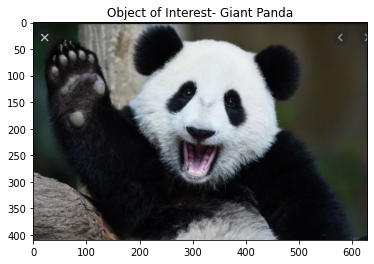

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
panda_image=load_img('/content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/train/Panda/Panda_49.JPG')
plt.imshow(panda_image)
plt.title('Object of Interest- Giant Panda')

In [ ]:
#Directories of Training,validation,testing set

dataset_path="/content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/"

train_dir=os.path.join(dataset_path,"train")

val_dir=os.path.join(dataset_path,"validation")

test_dir=os.path.join(dataset_path,"test/")
test_directory =os.path.join(dataset_path,"test")

train_dir


test_dir


'/content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/test/'

os.path.join joins the folder with the parent directory.There are total 100 images which inludes 50 images of Panda and 50 images of Not Panda in train set for training.
30 images which inludes 15 images of Panda and 15 images of Not Panda in validation set for validating
and 30 images which inludes 15 images of Panda and 15 images of Not Panda in Test set for testing   


# Dataset Verification

In [ ]:
#len funnction counts the number of files which are listed byos.listdir,join is used to append folders
print("Total Trainig Images",len(os.listdir(os.path.join(train_dir,'Panda'))) +len(os.listdir(os.path.join(train_dir,'Not Panda'))),"\n")

print("Total validation Images",len(os.listdir(os.path.join(val_dir,'Panda')))+ len(os.listdir(os.path.join(val_dir,'Not Panda'))),"\n")

print("Total Test Images:",len(os.listdir(os.path.join(test_directory,'Panda')))+ len(os.listdir(os.path.join(test_directory,'Not_panda'))))

Total Trainig Images 100 

Total validation Images 30 

Total Test Images: 30


# Dataset Loading and Processing with Image Data Generators

In [ ]:
#Initializing Image generator rescaling it to  1/255 to convert pixels into size of 0 to 1.

data_gen_train=ImageDataGenerator(rescale=1/255.0)
data_gen_valid=ImageDataGenerator(rescale=1/255.0) 

data_gen_test=ImageDataGenerator(rescale=1/255.0) # Intentionally kept without changing other parameter as to look test set differnt.



Created two folders in train, valid and test folder so that Imagedatagenerator can identify that there are total two types of classes of Images.
.class_indices function gives the output of which classes has been assigned to each folder,here Panda is of class 1 and not a panda is of class 0

In [ ]:
#Initializing common hyper parameter
image_width=148
image_height=148
batch_size=16
epochs=10

#Train generator ,generator is used to load all the training images in batches by providing image width and height
train_generator = data_gen_train.flow_from_directory(train_dir,
                                                     target_size=(image_width,image_height),
                                                     batch_size=batch_size,
                                                     class_mode='binary'
                                                     )
print("Training Classes",train_generator.class_indices)
print("")
#Validation generator is used to load all the validation images by providing image width and height
valid_generator=data_gen_valid.flow_from_directory(val_dir,
                                                   target_size=(image_width,image_height),
                                                   class_mode='binary',
                                                   batch_size=batch_size)
print("Validation Classes",valid_generator.class_indices)

print("")
#Test Data generator is used to load all the validation images by providing image width and height
test_generator=data_gen_test.flow_from_directory(test_directory,
                                                 target_size=(image_width,image_height),
                                                 batch_size=30,
                                                 class_mode='binary'
                                                 )
print("Testing Classes",test_generator.class_indices)

Found 100 images belonging to 2 classes.
Training Classes {'Not Panda': 0, 'Panda': 1}

Found 30 images belonging to 2 classes.
Validation Classes {'Not Panda': 0, 'Panda': 1}

Found 30 images belonging to 3 classes.
Testing Classes {'Not_panda': 0, 'Panda': 1, 'Panda (1)': 2}


Flow_from_directory is a  function from Image data generator which helps us to load all the images from the directory by assigning them classes based on the number of folders and imports all the images by rescaling the image size to 148,148

In [ ]:
image,label=next(train_generator) # next is used to show data in batches of 10 ,every time we run the batch elements will change 
print(label)

###############Defining a function to generate images in for loop######
#imshow function from skimage library is used to show images ,
#This function will be called in for loop for printing images 
from skimage import io
def imshow(image):
  io.imshow(image)
  io.show()

  


[1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]


.next function helps to load images and its label in batches. 
Image batch contains 16 images and label_batch contains  16 label corresponding to images.

16
1.0
Giant Panda


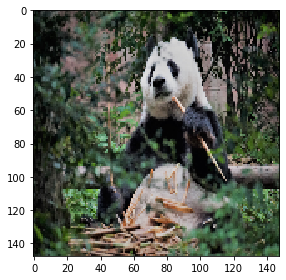

1.0
Giant Panda


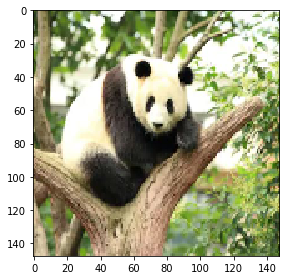

0.0
Not a Panda


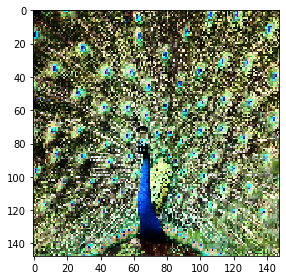

0.0
Not a Panda


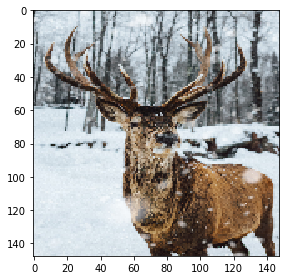

0.0
Not a Panda


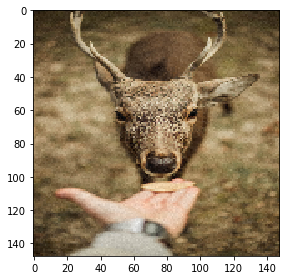

1.0
Giant Panda


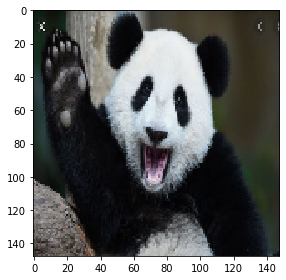

1.0
Giant Panda


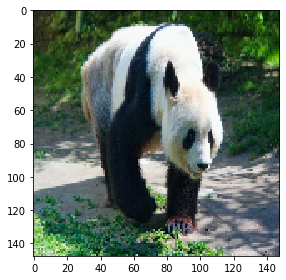

0.0
Not a Panda


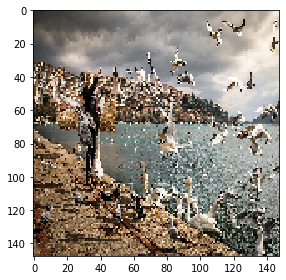

1.0
Giant Panda


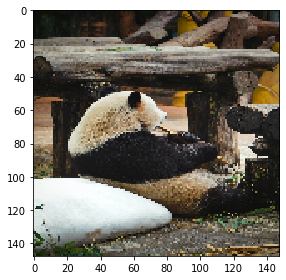

0.0
Not a Panda


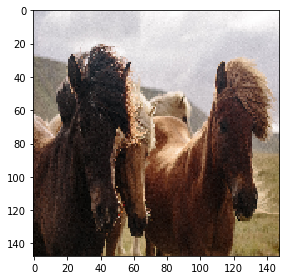

1.0
Giant Panda


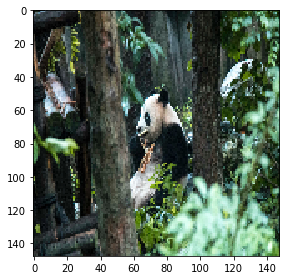

1.0
Giant Panda


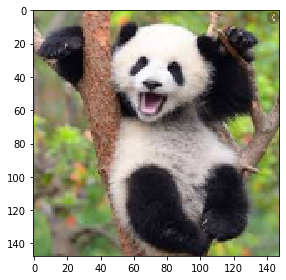

1.0
Giant Panda


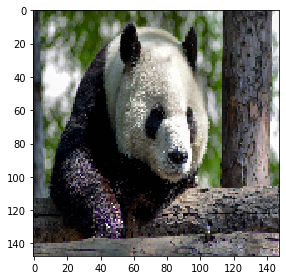

1.0
Giant Panda


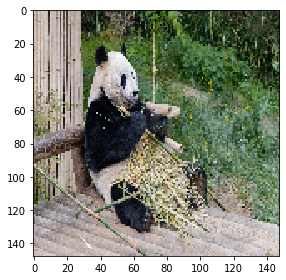

1.0
Giant Panda


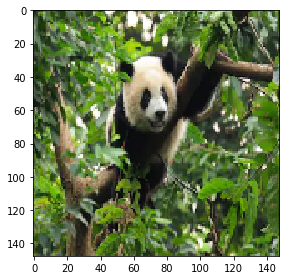

0.0
Not a Panda


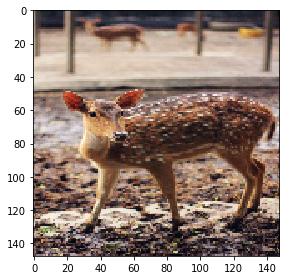

In [ ]:
#Printing batchwise 16 images and its corresponding Labels in the for loop.
image_batch,label_batch=train_generator.next()
print(len(image_batch))

for i in range(0,len(image_batch)):
  image=image_batch[i]
  print(label_batch[i])

  if label_batch[i]==1:
    print("Giant Panda")
  else:
    print("Not a Panda")
  imshow(image)

#Create and Evaluate a Model

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPool2D, Dense, Flatten, Dropout,BatchNormalization,Activation
from keras import Sequential,optimizers
input_shape=(148,148,3)

##Building a Convolutional Neural Network######
model=Sequential()

##First Layer
model.add(Conv2D(32,kernel_size=(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2) ))      #Maxpool2D is used to select maximum value of Image pixel

#model.add(BatchNormalization())


#Second layer####
model.add(Conv2D(32,kernel_size=(2,2)))   
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2) ))               

#Third Layer ##########
model.add(Conv2D(64,kernel_size=(2,2)))
model.add(Activation('relu'))                 
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(BatchNormalization())

model.add(Flatten())   #Output of flatten converts into one dimentioanl layer to create a fully connected network (Convert 3D array to 1D array)
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))  #For binaryClassification problem sigmoid is the only activation used
                                          # which works best with optimizer binary cross entrophy
model.compile(loss='binary_crossentropy',
              optimizer ='rmsprop',metrics=['accuracy'])



In the above Model we have used 2x2 filter as it is in the multiple of 148 ,which is the size of our image.
**Sigmoid activation** is used in the last layer as it supports binary_crossentropy.
**Rmsprop** combines the idea of only using the sign of the gradient with the 
idea of adapting the step size individually for each weight, thus it learns rapidly.
ref(https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)
As the images were less in number so we reduced the number of convolutional layer to 3
At the end we are using single neuron as we are predicting just two classes(Panda  or not at Panda)
Flatten is used at the end of con2D to convert the network into full connected neural network.


In [ ]:
# fit_generator is used in Image datagenerator as it generated Images batchwise and then fits the model

train_samples=100
validation_samples=30
history=model.fit_generator(train_generator,
                            steps_per_epoch=train_samples //batch_size ,       #Total number of train images /batch_size is steps_per_epoch
                            epochs=10,
                            validation_data=valid_generator,
                            validation_steps=validation_samples // batch_size)  #Total number of validation images / batch_size is validation_steps
                            
                                                       

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 36s 6s/step - loss: 1.0934 - accuracy: 0.4405 - val_loss: 0.6678 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 22s 4s/step - loss: 0.6886 - accuracy: 0.5595 - val_loss: 0.6680 - val_accuracy: 0.5625
Epoch 3/10
6/6 [==============================] - 22s 4s/step - loss: 0.6377 - accuracy: 0.6562 - val_loss: 0.6374 - val_accuracy: 0.5625
Epoch 4/10
6/6 [==============================] - 21s 4s/step - loss: 0.6653 - accuracy: 0.6786 - val_loss: 0.7296 - val_accuracy: 0.3750
Epoch 5/10
6/6 [==============================] - 22s 4s/step - loss: 0.6367 - accuracy: 0.6190 - val_loss: 0.5917 - val_accuracy: 0.6250
Epoch 6/10
6/6 [==============================] - 22s 4s/step - loss: 0.5204 - accuracy: 0.7708 - val_loss: 0.4851 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 24s 4s/step - loss: 0.4006 - accuracy: 0.8810 

In [ ]:
#This code will be run only once as it creates the directory and stores the best model which is been done already in the my_model folder
# Save the entire model as a SavedModel.
#!mkdir -p saved_model
#model.save('/content/drive/MyDrive/Machine_learning_2/LAB3/my_model') #Uncomment it if you want to save present running model

In [ ]:
#Accessing the best model which was trained on the same network.
model_path='/content/drive/MyDrive/Machine_learning_2/LAB3'
saved_model = tf.keras.models.load_model(model_path+'/my_model')

**Note**: Please note that from here onwards variable **model** will be the present model in the current session and variable **saved_model** is the best model saved already in the my_model folder after we got a val_acc of **1.0** and train_acc of **0.95**
ref(https://www.tensorflow.org/tutorials/keras/save_and_load)

# Report Accuracy on Test Set

In [ ]:

test_loss,test_acc=saved_model.evaluate(test_generator,batch_size=1) # Batchsize of 1 is given so that model can predict class and  evaluate one image at a time
#test_loss,test_acc=model.evaluate(test_generator,batch_size=1) # Current Running model

print("Test Accuracy :",test_acc)


1/1 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.9333
Test Accuracy : 0.9333333373069763


Received a Test Accuracy of **93.33%**

In [ ]:
saved_model.summary()
#Best model is saved in saved_model object,it has a val_acc of 1.0 and train of 0.95  it was trained on same network


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 147, 147, 32)      416       
_________________________________________________________________
activation_12 (Activation)   (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4128      
_________________________________________________________________
activation_13 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 35, 35, 64)       

# Model Plot

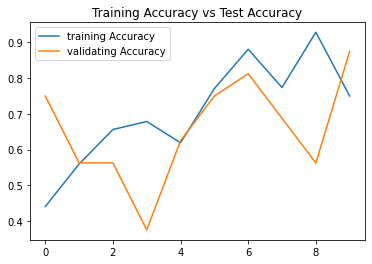

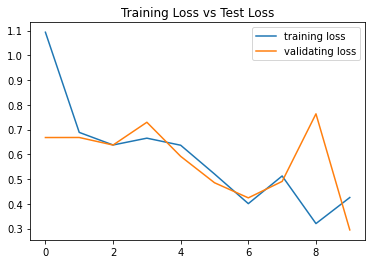

In [ ]:
########Accuracy Plot of Current Model#############
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training Accuracy','validating Accuracy'])
plt.title("Training Accuracy vs Test Accuracy")
plt.show()
####### Loss Plot of Current Model ##########################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validating loss'])
plt.title("Training Loss vs Test Loss")
plt.show()

# Predicting Test Classes using Image Classifer model
Created a for loop to predict classes of the Images and indentifying total number of misclassified classes.

In [ ]:
############################  Predicting classes of Test Images ################################################################

############    Model Prediction based on saved model in the folder ##########################################################
from keras.preprocessing import image

panda_counter=0
not_panda_counter=0

test_image_batch,test_label_batch=test_generator.next()
print(len(test_image_batch))
print("Actual Classs | Predicted Class")
for i in range(0,len(test_image_batch)):
  image=test_image_batch[i]
  label=test_label_batch[i]
  image=np.expand_dims(image,axis=0)   #Insert a new axis that will appear at the axis position in the expanded array shape as model requires 4d array of image

  pred_classes=saved_model.predict_classes(image,batch_size=1) #Saved model#Predicting the class based on input images keeping batchsize =1 as mentioned in Lab
  #pred_classes=model.predict_classes(image,batch_size=1)     ##current running model commented
  #pred_classes=classes[0][0]

  if pred_classes==0:
    print(label ,":  Not_panda (0)")
    if label==pred_classes:
      not_panda_counter +=1         #Incrementing not panda counter if there is a correct prediction.

    
    
  else:
    print(label ,":  Panda (1)")
    if label == pred_classes:
      panda_counter +=1               #Incrementing pandas Counter if there is a correct prediction
    
print("")    
print("Total panda Images",panda_counter)
print("Total Not Panda Images",not_panda_counter)
print("Total Error in Image Classification", 30 - (panda_counter+not_panda_counter))




30
Actual Classs | Predicted Class
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
1.0 :  Panda (1)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
1.0 :  Panda (1)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
0.0 :  Panda (1)
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
1.0 :  Not_panda (0)
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
1.0 :  Panda (1)
1.0 :  Panda (1)
0.0 :  Not_panda (0)
1.0 :  Panda (1)
1.0 :  Panda (1)
1.0 :  Panda (1)
1.0 :  Panda (1)
0.0 :  Not_panda (0)
1.0 :  Panda (1)

Total panda Images 14
Total Not Panda Images 14
Total Error 

#PART 3 Data Augmentation

This technique is used to artificially extend the training dataste in order to improve the model accuracy by letting the model learn from variation in train  data and to test performance on the unaugmented test data.

# Dataset Verification

In [ ]:
print("Total Trainig Images",len(os.listdir(os.path.join(train_dir,'Panda'))) +len(os.listdir(os.path.join(train_dir,'Not Panda'))),"\n")

print("Total validation Images",len(os.listdir(os.path.join(val_dir,'Panda')))+ len(os.listdir(os.path.join(val_dir,'Not Panda'))),"\n")

print("Total Test Images:",len(os.listdir(os.path.join(test_directory,'Panda')))+ len(os.listdir(os.path.join(test_directory,'Not_panda'))))

Total Trainig Images 100 

Total validation Images 30 

Total Test Images: 30


In [ ]:
#Image Augmentation parameters ,Augmentating only training set so that model can learn more on data.
aug_datagen=ImageDataGenerator(rotation_range=100,
                           width_shift_range=0.1,
                           height_shift_range=0.2,
                           rescale=1./255.0,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           zca_whitening=False, 
                           zca_epsilon=1e-06,
                           vertical_flip=True,
                           cval=0.0,
                           brightness_range=None,

                           fill_mode='nearest')
                           
data_gen_valid=ImageDataGenerator(rescale=1/255.0) 

data_gen_test=ImageDataGenerator(rescale=1/255.0)                           



*   **shear_range**:Shear angle in counter-clockwise direction in degrees,
*   **vertical_flip**: Flips the image vertically.

*   **fill_modePoints** outside the boundaries of the input are filled according to the given mode

*   **zca_epsilon** epsilon for ZCA whitening. Default is 1e-6

Ref link(https://keras.io/api/preprocessing/image/)








Text(0.5, 1.0, 'Image to be augmented')

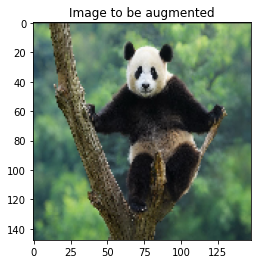

In [ ]:
#Loading a single Image tobe augmentated and resizing it to size 148 ,148
pic=load_img('/content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/train/Panda/Panda_31.JPG',target_size=(148,148))
plt.imshow(pic)
plt.title("Image to be augmented")

In [ ]:
pic_array=img_to_array(pic)   #Converting image to array

print(pic_array.shape)               #Numpy array of shape(148,148,3)

# For Augmentation we have to convert it into 4D , so adding one more dimention to the existing 3D Array
pic_array=pic_array.reshape((1,) + pic_array.shape)
pic_array.shape

(148, 148, 3)


(1, 148, 148, 3)

In [ ]:
#The flow command below generates the batches of randomly transformed images and saves in it in the generated data directory.
#Below code performs 5 augmentaion technique on a image and saves it in gen_img_dir.
gen_img_dir='/content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/generated_images'

count=0
for image in aug_datagen.flow(pic_array,save_to_dir=gen_img_dir ,batch_size= 1 ,save_prefix='Panda',save_format='.jpeg'):
  
  count += 1


  
  if count ==5:
    break


print("5 images have been generated in /content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/generated_image ")


5 images have been generated in /content/drive/MyDrive/Machine_learning_2/LAB3/Panda_img/generated_image 


In [ ]:
#Creating function to imprint images in for loop
from skimage import io
def imshow(img_rgb):
  io.imshow(img_rgb)
  io.show()

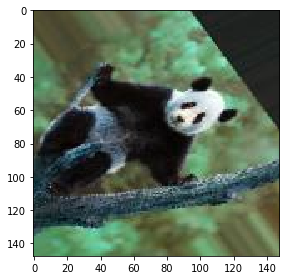

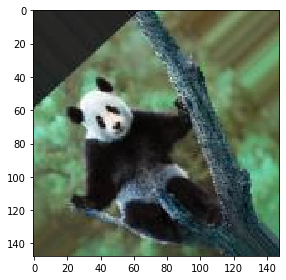

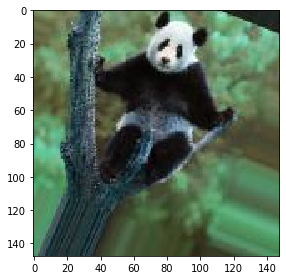

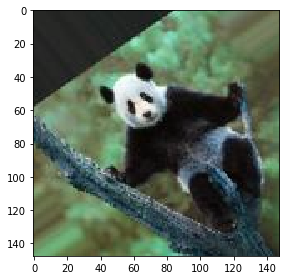

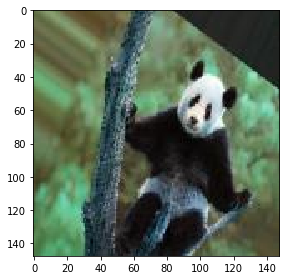

In [ ]:

count=0
for file in os.listdir(gen_img_dir):
    img=cv2.imread(os.path.join(gen_img_dir,file))  #cv2 library is used to read image and join path
    #img=array_to_img(img)
    imshow(img)
    count+=1
    if count==5:
      break



In [ ]:
#Flow from directory is used to load the images from directory with proper classes.

aug_train_generator = aug_datagen.flow_from_directory(train_dir,
                                                     target_size=(image_width,image_height),
                                                     batch_size=batch_size,
                                                     class_mode='binary'
                                                     )
                               

print("Aug Training Classes",train_generator.class_indices)
print("")
#Validation generator
valid_generator=data_gen_valid.flow_from_directory(val_dir,
                                                   target_size=(image_width,image_height),
                                                   class_mode='binary',
                                                   batch_size=batch_size)
print("Validation Classes",valid_generator.class_indices)

print("")
#Test Data generator
test_generator=data_gen_test.flow_from_directory(test_directory,
                                                 target_size=(image_width,image_height),
                                                 batch_size=30,
                                                 class_mode='binary'
                                                 )
print("Testing Classes",test_generator.class_indices)                                                   

Found 100 images belonging to 2 classes.
Aug Training Classes {'Not Panda': 0, 'Panda': 1}

Found 30 images belonging to 2 classes.
Validation Classes {'Not Panda': 0, 'Panda': 1}

Found 30 images belonging to 3 classes.
Testing Classes {'Not_panda': 0, 'Panda': 1, 'Panda (1)': 2}


In [ ]:
history1=saved_model.fit_generator(aug_train_generator,
                            steps_per_epoch=train_samples //batch_size ,       #Total number of images /batch_size 
                            epochs=10,
                            validation_data=valid_generator,
                            validation_steps=validation_samples // batch_size)


#history1=model.fit_generator(aug_train_generator,
                            #steps_per_epoch=train_samples //batch_size ,       #Commented Current model 
                            #epochs=10,
                            #validation_data=valid_generator,
                            #validation_steps=validation_samples // batch_size)

Epoch 1/10
6/6 [==============================] - 23s 4s/step - loss: 0.6526 - accuracy: 0.7083 - val_loss: 0.3733 - val_accuracy: 0.9375
Epoch 2/10
6/6 [==============================] - 21s 3s/step - loss: 0.4764 - accuracy: 0.7738 - val_loss: 0.5456 - val_accuracy: 0.6875
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 0.4743 - accuracy: 0.8214 - val_loss: 0.2824 - val_accuracy: 0.9375
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 0.4187 - accuracy: 0.8214 - val_loss: 0.2842 - val_accuracy: 0.8750
Epoch 5/10
6/6 [==============================] - 22s 4s/step - loss: 0.5305 - accuracy: 0.7857 - val_loss: 0.3613 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 22s 4s/step - loss: 0.4688 - accuracy: 0.8333 - val_loss: 0.4366 - val_accuracy: 0.8125
Epoch 7/10
6/6 [==============================] - 22s 4s/step - loss: 0.5007 - accuracy: 0.7857 - val_loss: 0.3265 - val_accuracy: 0.8750
Epoch 8/10
6/6 [==================

Batch size of 1 is given in evaluate to evaluate one image per batch

In [ ]:
#Test Accuracy after Augmentation  
test_loss,test_acc=saved_model.evaluate(test_generator,batch_size=1)  
#test_loss,test_acc=model.evaluate(test_generator,batch_size=1)  #Commented current running model
print("Test Accuracy after Augmentation :",test_acc*100,"%")

1/1 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8667
Test Accuracy after Augmentation : 86.66666746139526 %


# Model Plot

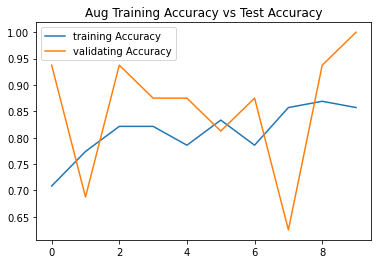

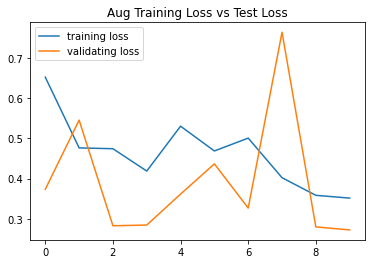

In [ ]:
########Accuracy Plot of Saved model(best_model)#############
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['training Accuracy','validating Accuracy'])
plt.title("Aug Training Accuracy vs Test Accuracy")
plt.show()
####### Loss Plot of Saved Model (best_model)##########################
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['training loss','validating loss'])
plt.title("Aug Training Loss vs Test Loss")
plt.show()

# Augementation provides diversity in images which helps model learn more during training process,thereby increasing the accuracy.


**Reference link**
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

(https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

